# Real time: FRB 220207aabh (SNR 60)

In [1]:
from burstfit.fit import BurstFit
from burstfit.data import BurstData
from burstfit.model import Model, SgramModel
from burstfit.utils.plotter import plot_me
from burstfit.utils.functions import pulse_fn_vec, sgram_fn_vec, sgram_fn, gauss, gauss2, model_free_4,model_free, power_law, pulse_fn2 
from burstfit.utils.plotter import plot_fit_results, plot_2d_fit 
from burstfit.io import BurstIO
import logging
import numpy as np
import math
import matplotlib.pyplot as plt
# use Liam's function to read in filterbank files 
import sys
sys.path.insert(1, '/home/ubuntu/gechen/software')
import filplot_funcs_gc as ff

#from burstfit.utils.functions import gauss_norm2, pulse_fn_vec, sgram_fn_vec 
%matplotlib inline 


# input variables 
candidate = '220207aabh'
datestring = '2022_2_6_19_34_4'
beam = 136
corr = 'corr09'
dm_heimdall = 262.3
width_heimdall = 2 
snr_heimdall = 60
mask_chans=[] 

fil_file ='/data/dsa110/T1/'+corr + '/' + datestring + '/fil_'+candidate+'/'+candidate+'_'+str(beam)+'.fil'
#fil_file = '/home/ubuntu/vikram/scratch/220319aaeb.fil'
save_name = candidate + '_beam_'+str(beam)
save_dir = '/home/ubuntu/gechen/burstfit_tests_outputs/' 


#data = ff.proc_cand_fil(fil_file, dm, width, nfreq_plot=64, ndm=64)[0]
#data_t = data.mean(0)

logging_format = "%(asctime)s - %(funcName)s -%(name)s - %(levelname)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=logging_format,
)
# create burst object 
bd = BurstData(
    fp=fil_file,
    dm=dm_heimdall ,
    tcand=0.5, # pulse starting time in s.
    width=width_heimdall,  
    snr=snr_heimdall
)

bd.prepare_data()

# number of channels after binning 
# requires each channel bin to have SNR_min 
# snr_heimdall was calculated with all 256 channels binned into one 
SNR_min = 5 # check?  
n_per_bin = int(256. / (1.0*snr_heimdall / SNR_min)**2) 
if n_per_bin <= 1:
    n_per_bin = 1
elif not math.log(n_per_bin, 2).is_integer():
    n_per_bin = 2 ** (int(np.log2(n_per_bin))+1)
    
nfreq = int(256 / n_per_bin) 
print(nfreq)
#nfreq = 4

/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/burstfit-0.1.1-py3.6.egg/burstfit/utils/plotter.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ubuntu/anac

datacite/tind env not found. Cannot use datacite API


2022-05-17 00:15:52,277 - prepare_data -burstfit.data - INFO - Preparing data for burst fitting.
2022-05-17 00:15:52,545 - crop_dedispersed_data -burstfit.data - INFO - Cropping data with time_window: 0.2s.
2022-05-17 00:15:52,548 - normalise_data -burstfit.data - INFO - Normalising data using off pulse mean and std.
2022-05-17 00:15:52,561 - normalise_data -burstfit.data - INFO - Off pulse mean and std are: (24.256375720206208, 24.26713594297242)


256


## de-disperse data (or read from file) and chop near the burst time

In [3]:
# # save the de-dispersed data to file (de-dispersion takes long time)
# nfreq = 4

# data = ff.proc_cand_fil(fil_file, bd.dm, bd.width, nfreq_plot=nfreq, ndm=64)[0]
# np.save('%s_%d.txt'%(candidate, nfreq), data, allow_pickle=False)

In [14]:
# chop near the burst region and plot (adjust as needed)
i_low = int(0.500/bd.tsamp - 10*bd.width)
i_high = int(0.500/bd.tsamp + 15*bd.width)

220207aabh_4.txt


Text(0.5,0,'time sample')

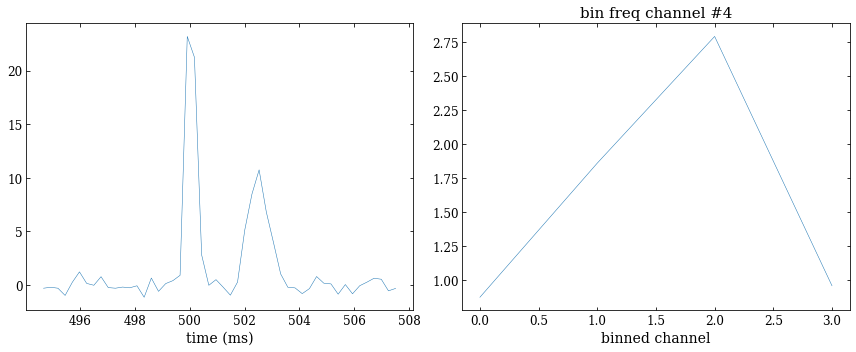

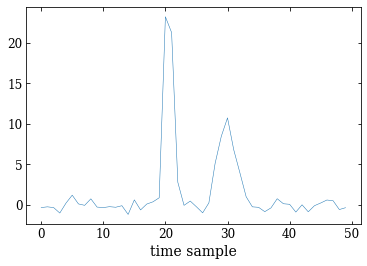

In [15]:
# read in de-dispersed data file
nfreq = 4

print('%s_%d.txt'%(candidate, nfreq))
data = np.load('%s_%d.txt.npy'%(candidate, nfreq))

# chop near the burst region and plot 
data_burst = data[:, i_low: i_high] # change to x * width 
t_burst_ms = [i * bd.tsamp * 1e3 for i in range(i_low, i_high)]

fig1, ax1 = plt.subplots(1, 2, figsize=(12, 5)) 
#fig1.set_size_inches(12., 5.)
ax1[0].plot(t_burst_ms, data_burst.mean(0))
ax1[0].set_xlabel('time (ms)')
ax1[1].plot(data_burst.mean(1))
ax1[1].set_xlabel('binned channel')
ax1[1].set_title('bin freq channel #%d'%nfreq)
plt.tight_layout()

plt.figure()
plt.plot(data_burst.mean(0))
plt.xlabel('time sample')

## Fit with models

self.function_input_names:  ['S1', 'mu1', 'sigma1', 'tau1', 'S2', 'mu2', 'sigma2', 'tau2']
self.function_input_names:  ['S1', 'mu1', 'sigma1', 'S2', 'mu2', 'sigma2']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c0', 'c1', 'c2', 'c3']


2022-05-17 00:46:22,484 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-05-17 00:46:22,557 - initial_profilefit -burstfit.fit - INFO - Converged parameters (profile fit) are:
2022-05-17 00:46:22,558 - initial_profilefit -burstfit.fit - INFO - S1: 14.183253011627114 +- 5.9484431017885664e-05
2022-05-17 00:46:22,560 - initial_profilefit -burstfit.fit - INFO - mu_t1: 20.99692097901445 +- 0.0005871698787399442
2022-05-17 00:46:22,562 - initial_profilefit -burstfit.fit - INFO - sigma_t1: 0.06651245987186667 +- 0.01265739594182198
2022-05-17 00:46:22,563 - initial_profilefit -burstfit.fit - INFO - S2: 19.36337216372828 +- 873561.7901036873
2022-05-17 00:46:22,565 - initial_profilefit -burstfit.fit - INFO - mu_t2: 30.00173434804729 +- 45320.12056998025
2022-05-17 00:46:22,567 - initial_profilefit -burstfit.fit - INFO - sigma_t2: 0.17974860081254435 +- 8143.1694739911045


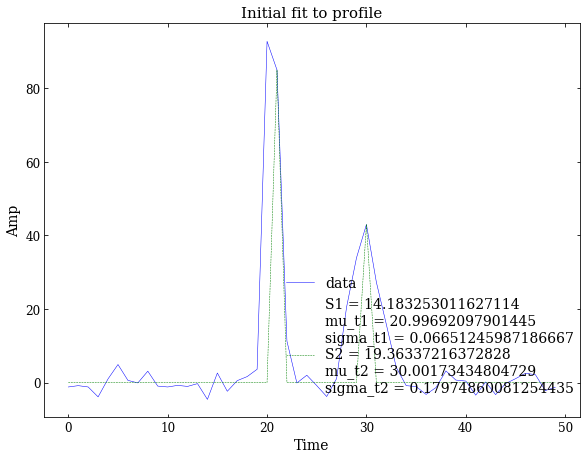

In [25]:
# bf_S1T2_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S1', 'mu_t1', 'sigma_t1', 'tau1', 'S2', 'mu_t2', 'sigma_t2', 'tau2']
pulseModel = Model(pulse_fn2, param_names=pnames)
profile_bounds=[(0, 15, 0, 0, 0, 25, 0, 0),(np.inf, 25, 10*bd.width, np.inf, np.inf, 35, 5*bd.width, np.inf)]

pnames = ['S1', 'mu_t1', 'sigma_t1', 'S2', 'mu_t2', 'sigma_t2']
pulseModel = Model(gauss2, param_names=pnames)
profile_bounds=[(0, 15, 0, 0, 25, 0),(np.inf, 25, 5*bd.width, np.inf, 35, 5*bd.width)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0),(np.inf, 0.55, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c1 for later model selection 
bf_S1T2_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c1.validate()
bf_S1T2_c1.precalc()


# fit tests
bf_S1T2_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c1.initial_spectrafit(plot = True)

# bf_S1T2_c1.fitcycle(plot=True) # fit for one component.
# bf_S1T2_c1.fitall(plot=True, max_ncomp = ncomp, profile_bounds = profile_bounds) # fit all componnts 
# print('bf_S1T2_c1.calc_redchisq()=', bf_S1T2_c1.calc_redchisq())

# # plot fit for all components 
# plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
#                  bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
# dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]



### bf_S1T2_cx: model-free spectrum + gaussian with scattering profile + x components

self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-26 00:23:31,732 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-26 00:23:31,734 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-26 00:23:31,739 - tests -root - INFO - P values: T-test (0.92331), Kruskal (0.98496), KS (0.71641), F-test (0.06950)
2022-04-26 00:23:31,741 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-04-26 00:23:31,744 - tests -root - INFO - P values: T-test (0.00494), Kruskal (0.00091), KS (0.00012), F-test (0.00000)
2022-04-26 00:23:31,746 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-04-26 00:23:31,750 - tests -root - INFO - P values: T-test (0.00507), Kruskal (0.00165), KS (0.00302), F-test (0.00000)
2022-04-26 00:23:31,752 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-04-26 00:23:31,754 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-04-26 00:23:31,773 - initial_profilefi

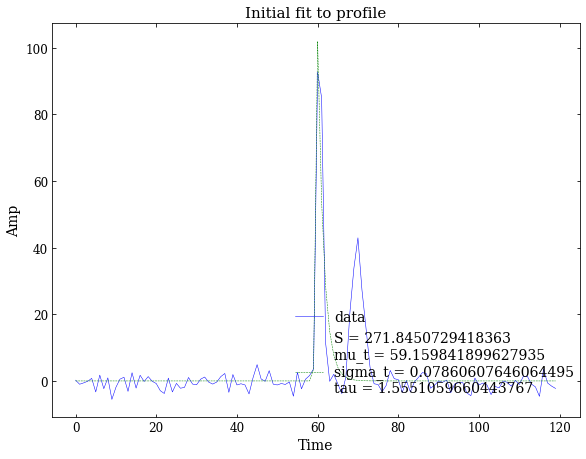

2022-04-26 00:23:31,962 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-26 00:23:31,965 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7fc803882b70>
[0.14064382 0.37830928 0.47239777 0.15794225]


2022-04-26 00:23:31,971 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-26 00:23:31,972 - initial_spectrafit -burstfit.fit - INFO - c0: 0.14064382016658783 +- 0.0
2022-04-26 00:23:31,974 - initial_spectrafit -burstfit.fit - INFO - c1: 0.3783092796802521 +- 0.0
2022-04-26 00:23:31,976 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4723977744579315 +- 0.0
2022-04-26 00:23:31,978 - initial_spectrafit -burstfit.fit - INFO - c3: 0.1579422503709793 +- 0.0


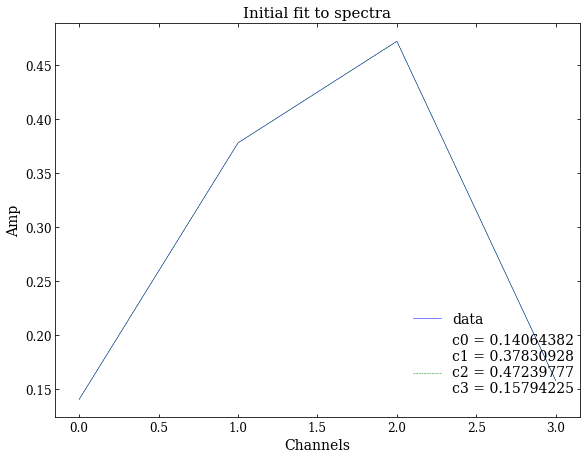

2022-04-26 00:23:32,155 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-04-26 00:23:32,157 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.14064382, 0.37830928, 0.47239777, 0.15794225, 271.8450729418363, 59.159841899627935, 0.07860607646064495, 1.5551059660443767, 262.3]
2022-04-26 00:23:32,323 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-26 00:23:32,325 - sgram_fit -burstfit.fit - INFO - c0: 0.11995875701549272 +- 0.21260863870208307
2022-04-26 00:23:32,327 - sgram_fit -burstfit.fit - INFO - c1: 0.18032214399819402 +- 0.3339587595564871
2022-04-26 00:23:32,330 - sgram_fit -burstfit.fit - INFO - c2: 0.21513708052333833 +- 0.35153194665146437
2022-04-26 00:23:32,332 - sgram_fit -burstfit.fit - INFO - c3: 0.17071188407457272 +- 0.26804334055997264
2022-04-26 00:23:32,334 - sgram_fit -burstfit.fit - INFO - S: 271.0601363615537 +- 129.73857980695206
2022-04-26 00:23:32,336 - sgram_fit -burstfit.fit - INFO - m

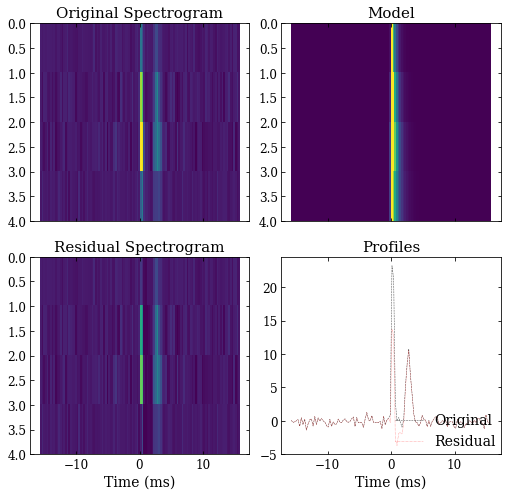

2022-04-26 00:23:32,728 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:23:32,731 - model -burstfit.fit - INFO - Found 1 components.
2022-04-26 00:23:32,734 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-26 00:23:32,736 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-26 00:23:32,739 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:23:32,741 - model -burstfit.fit - INFO - Found 1 components.
2022-04-26 00:23:32,744 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 11.474132453927176
2022-04-26 00:23:32,746 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-26 00:23:32,747 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-26 00:23:32,751 - tests -root - INFO - P values: T-test (0.92331), Kruskal (0.98496), KS (0.71641), F-test (0.06950)
2022-04-26 00:23:32,753 - run

bf_S1T2_c1.calc_redchisq()= 11.474132453927176


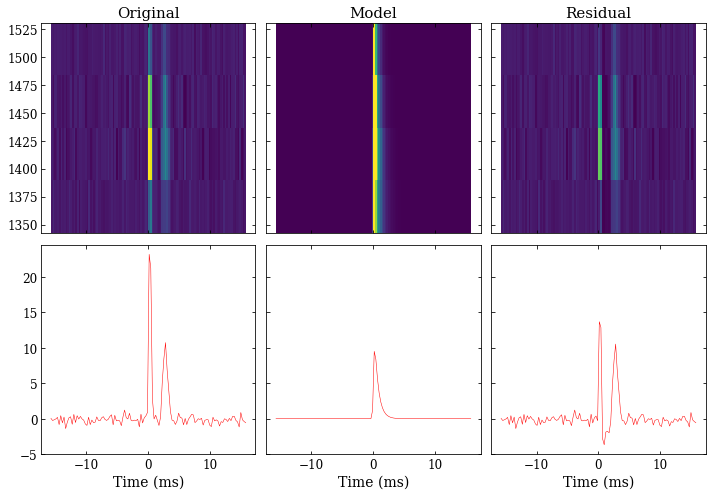

In [12]:
# bf_S1T2_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
#profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0),(np.inf, 0.55, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c1 for later model selection 
bf_S1T2_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c1.validate()
bf_S1T2_c1.precalc()


# fit tests
#bf_S1T2_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c1.initial_spectrafit(plot = True)

#bf_S1T2_c1.fitcycle(plot=True) # fit for one component.
bf_S1T2_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
print('bf_S1T2_c1.calc_redchisq()=', bf_S1T2_c1.calc_redchisq())

# plot fit for all components 
plot_fit_results(bf_S1T2_c1.sgram, bf_S1T2_c1.sgram_model.evaluate, bf_S1T2_c1.sgram_params['all'][1]['popt'], 
                 bf_S1T2_c1.tsamp, bf_S1T2_c1.fch1, bf_S1T2_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
dm_fit, dm_fit_err = bf_S1T2_c1.sgram_params['all'][1]['popt'][-1], bf_S1T2_c1.sgram_params['all'][1]['perr'][-1]



In [18]:
bf_S1T2_c1.sgram_params 
bd.tsamp 

0.000262144

In [8]:
#bf_S1T2_c1.off_pulse_ts_std

In [17]:
# mcmc_kwargs = {}
# mcmc_kwargs = {'nwalkers':60, 'nsteps':int(1e4),
#            'skip':500, 'ncores':4, 
#            'start_pos_dev':0.01,
#            'prior_range':0.8, 
#            'save_results':True,
#            'outname':'test_file'}

# bf_S1T2_c1.run_mcmc(plot=True, **mcmc_kwargs)


self.function_input_names:  ['S', 'mu', 'sigma', 'tau']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-26 00:02:12,495 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-26 00:02:12,497 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-26 00:02:12,502 - tests -root - INFO - P values: T-test (0.92331), Kruskal (0.98496), KS (0.71641), F-test (0.06950)
2022-04-26 00:02:12,504 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (L) test
2022-04-26 00:02:12,510 - tests -root - INFO - P values: T-test (0.00494), Kruskal (0.00091), KS (0.00012), F-test (0.00000)
2022-04-26 00:02:12,512 - run_tests -burstfit.fit - INFO - Running on pulse - off pulse (R) test
2022-04-26 00:02:12,517 - tests -root - INFO - P values: T-test (0.00507), Kruskal (0.00165), KS (0.00302), F-test (0.00000)
2022-04-26 00:02:12,519 - fitcycle -burstfit.fit - INFO - Fitting component 1.
2022-04-26 00:02:12,521 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1
2022-04-26 00:02:12,539 - initial_profilefi

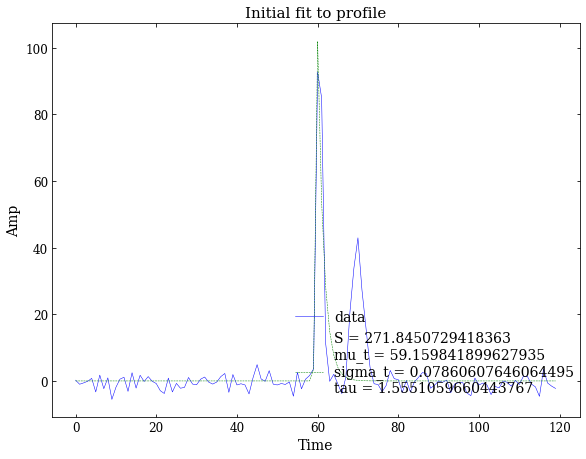

2022-04-26 00:02:12,730 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-26 00:02:12,733 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 1


<function model_free_4 at 0x7f6ee94a7730>
[0.14064382 0.37830928 0.47239777 0.15794225]


2022-04-26 00:02:12,741 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-26 00:02:12,743 - initial_spectrafit -burstfit.fit - INFO - c0: 0.14064382016658783 +- 0.0
2022-04-26 00:02:12,746 - initial_spectrafit -burstfit.fit - INFO - c1: 0.3783092796802521 +- 0.0
2022-04-26 00:02:12,748 - initial_spectrafit -burstfit.fit - INFO - c2: 0.4723977744579315 +- 0.0
2022-04-26 00:02:12,750 - initial_spectrafit -burstfit.fit - INFO - c3: 0.1579422503709793 +- 0.0


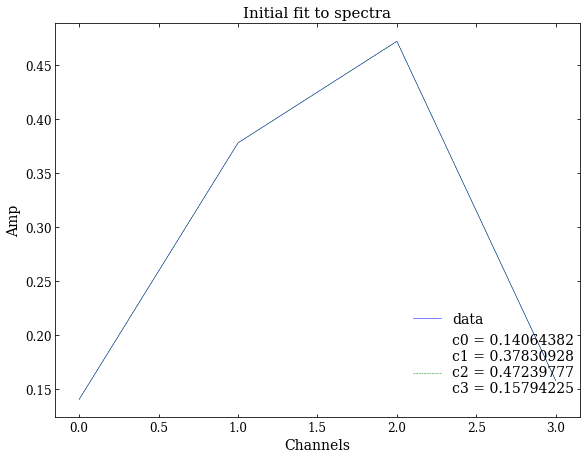

2022-04-26 00:02:12,930 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 1
2022-04-26 00:02:12,933 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.14064382, 0.37830928, 0.47239777, 0.15794225, 271.8450729418363, 59.159841899627935, 0.07860607646064495, 1.5551059660443767, 262.3]
2022-04-26 00:02:13,098 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-26 00:02:13,100 - sgram_fit -burstfit.fit - INFO - c0: 0.11995875701549272 +- 0.21260863870208307
2022-04-26 00:02:13,103 - sgram_fit -burstfit.fit - INFO - c1: 0.18032214399819402 +- 0.3339587595564871
2022-04-26 00:02:13,105 - sgram_fit -burstfit.fit - INFO - c2: 0.21513708052333833 +- 0.35153194665146437
2022-04-26 00:02:13,108 - sgram_fit -burstfit.fit - INFO - c3: 0.17071188407457272 +- 0.26804334055997264
2022-04-26 00:02:13,111 - sgram_fit -burstfit.fit - INFO - S: 271.0601363615537 +- 129.73857980695206
2022-04-26 00:02:13,112 - sgram_fit -burstfit.fit - INFO - m

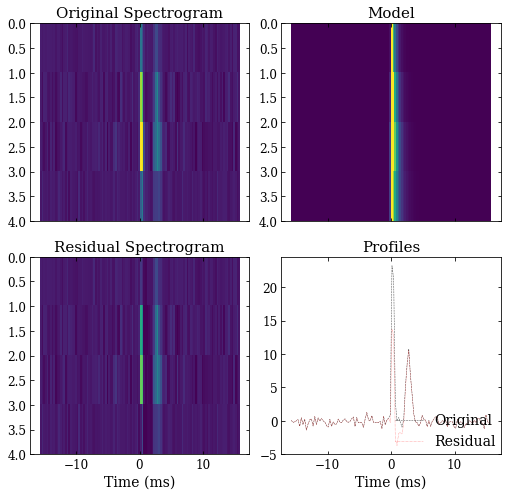

2022-04-26 00:02:13,492 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:02:13,495 - model -burstfit.fit - INFO - Found 1 components.
2022-04-26 00:02:13,499 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-26 00:02:13,502 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-26 00:02:13,505 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:02:13,506 - model -burstfit.fit - INFO - Found 1 components.
2022-04-26 00:02:13,511 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 11.474132453927176
2022-04-26 00:02:13,513 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-26 00:02:13,515 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-26 00:02:13,521 - tests -root - INFO - P values: T-test (0.92331), Kruskal (0.98496), KS (0.71641), F-test (0.06950)
2022-04-26 00:02:13,522 - run

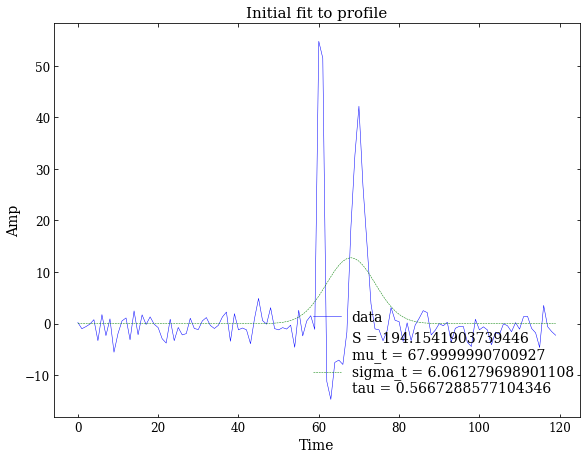

2022-04-26 00:02:13,763 - make_spectra -burstfit.fit - INFO - Making spectra using profile fit parameters.
2022-04-26 00:02:13,767 - initial_spectrafit -burstfit.fit - INFO - Running spectra profile fit for component: 2


<function model_free_4 at 0x7f6ee94a7730>
[0.1013857674611015 0.3684973189807059 0.5519407592236178
 0.05773807613025144]


2022-04-26 00:02:13,772 - initial_spectrafit -burstfit.fit - INFO - Converged parameters (spectra fit) are:
2022-04-26 00:02:13,774 - initial_spectrafit -burstfit.fit - INFO - c0: 0.1013857674611015 +- 0.0
2022-04-26 00:02:13,776 - initial_spectrafit -burstfit.fit - INFO - c1: 0.3684973189807059 +- 0.0
2022-04-26 00:02:13,777 - initial_spectrafit -burstfit.fit - INFO - c2: 0.5519407592236178 +- 0.0
2022-04-26 00:02:13,779 - initial_spectrafit -burstfit.fit - INFO - c3: 0.05773807613025144 +- 0.0


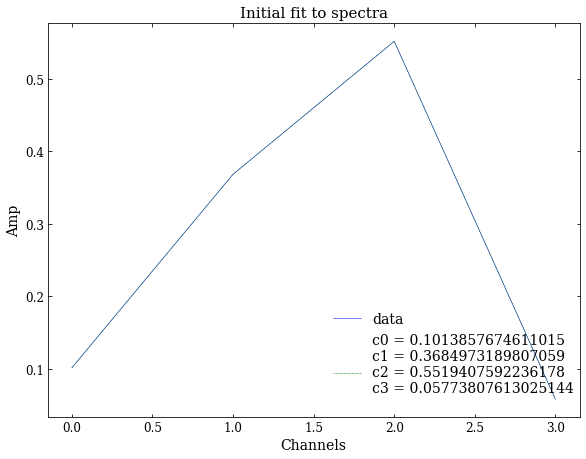

2022-04-26 00:02:13,950 - sgram_fit -burstfit.fit - INFO - Running sgram profile fit for component: 2
2022-04-26 00:02:13,953 - sgram_fit -burstfit.fit - INFO - initial estimate for parameters: [0.1013857674611015, 0.3684973189807059, 0.5519407592236178, 0.05773807613025144, 194.1541903739446, 67.9999990700927, 6.061279698901108, 0.5667288577104346, 262.3]
/home/ubuntu/anaconda3/envs/casa/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
2022-04-26 00:02:14,011 - run_fit -burstfit.curvefit - WARNING - Fit errors are not finite. Retrying with p0+-(0.2*p0) bounds
2022-04-26 00:02:14,079 - sgram_fit -burstfit.fit - INFO - Converged parameters are:
2022-04-26 00:02:14,082 - sgram_fit -burstfit.fit - INFO - c0: 0.10238759893429782 +- 0.068270294739033
2022-04-26 00:02:14,084 - sgram_fit -burstfit.fit - INFO - c1: 0.3580739311390054 +- 0.07425223368142546
2022-04-26 00:02:14,087 - sgram_

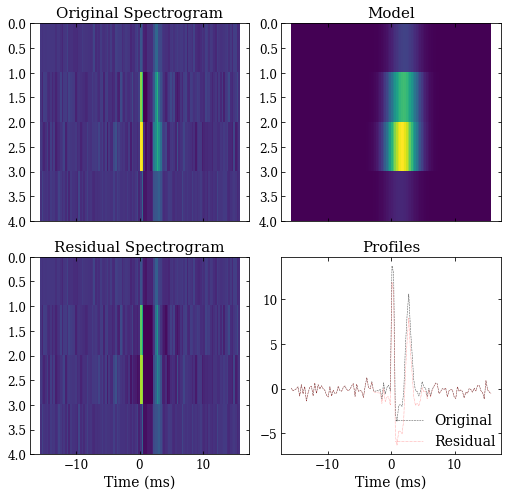

2022-04-26 00:02:14,481 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:02:14,484 - model -burstfit.fit - INFO - Found 2 components.
2022-04-26 00:02:14,490 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-26 00:02:14,493 - get_off_pulse_region -burstfit.fit - INFO - Using sgram fit parameters.
2022-04-26 00:02:14,495 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:02:14,497 - model -burstfit.fit - INFO - Found 2 components.
2022-04-26 00:02:14,502 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 12.9199602935677
2022-04-26 00:02:14,503 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-26 00:02:14,505 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-26 00:02:14,509 - tests -root - INFO - P values: T-test (0.92331), Kruskal (0.98496), KS (0.71641), F-test (0.06950)
2022-04-26 00:02:14,511 - run_t

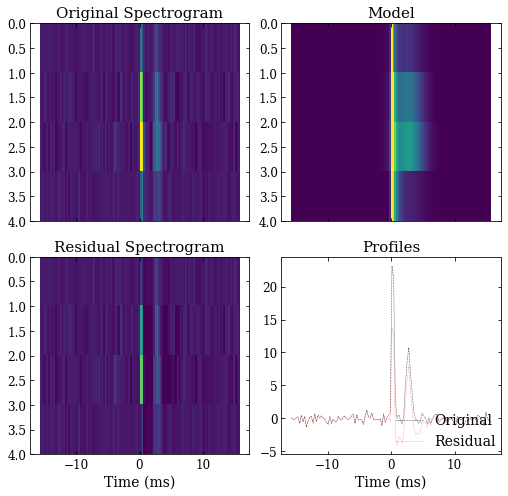

2022-04-26 00:02:16,353 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:02:16,356 - model -burstfit.fit - INFO - Found 2 components.
2022-04-26 00:02:16,359 - get_off_pulse_region -burstfit.fit - INFO - mu_t and sigma_t found in params. Using those to estimate off pulse region.
2022-04-26 00:02:16,362 - get_off_pulse_region -burstfit.fit - INFO - Using sgram all-component-fit parameters.
2022-04-26 00:02:16,364 - model -burstfit.fit - INFO - Making model.
2022-04-26 00:02:16,366 - model -burstfit.fit - INFO - Found 2 components.
2022-04-26 00:02:16,370 - calc_redchisq -burstfit.fit - INFO - Reduced chi-square value of fit is: 10.93999546369589
2022-04-26 00:02:16,371 - run_tests -burstfit.fit - INFO - Running statistical tests on the residual.
2022-04-26 00:02:16,373 - run_tests -burstfit.fit - INFO - Running off pulse - off pulse test
2022-04-26 00:02:16,377 - tests -root - INFO - P values: T-test (0.92331), Kruskal (0.98496), KS (0.71641), F-test (0.06950)
2022-04-26 00:02

{1: {'popt': [0.11995875701549272,
   0.18032214399819402,
   0.21513708052333833,
   0.17071188407457272,
   271.0601363615537,
   59.143647975512614,
   0.06961857264866157,
   1.7475413444060781,
   262.2400915312158],
  'perr': array([  0.21260864,   0.33395876,   0.35153195,   0.26804334,
         129.73857981,   3.08352944,   1.39248534,   0.7834784 ,
           0.82847375])},
 2: {'popt': [0.10238759893429782,
   0.3580739311390054,
   0.5179568574327097,
   0.0580204721463237,
   194.5555913739925,
   67.8013380796319,
   6.503823563571465,
   0.5667288577104346,
   261.00556289453846],
  'perr': array([6.82702947e-02, 7.42522337e-02, 8.07372846e-02, 6.80005734e-02,
         1.80090043e+01, 2.23122816e+00, 3.17495456e-01, 4.01826484e-13,
         2.24155645e+00])},
 'all': {1: {'popt': [0.11104880456837746,
    0.15678064582172394,
    0.17319130049358042,
    0.17095667780718884,
    271.83263538822007,
    59.115374285193276,
    0.061797856702934445,
    1.4245173277488539,


In [17]:
# bf_S1T2_c2: two components
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel
ncomp = 2 

pnames = ['S', 'mu_t', 'sigma_t', 'tau']
pulseModel = Model(pulse_fn_vec, param_names=pnames)
profile_bounds=[(0, 480, 0, 0),(np.inf, 510, 10*bd.width, np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

#sgram_bounds=((0, 0.45, 0, -np.inf),(np.inf, 0.55, np.inf, np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T2_c2 for later model selection 
bf_S1T2_c2 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T2_c2.validate()
bf_S1T2_c2.precalc()


# fit tests
#bf_S1T2_c2.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T2_c2.initial_spectrafit(plot = True)

#bf_S1T2_c2.fitcycle(plot=True) # fit for one component.
bf_S1T2_c2.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
bf_S1T2_c2.calc_redchisq()

# plot fit for all components 
# plot_fit_results(bf_S1T2_c2.sgram, bf_S1T2_c2.sgram_model.evaluate, bf_S1T2_c2.sgram_params['all'][1]['popt'], 
#                  bf_S1T2_c2.tsamp, bf_S1T2_c2.fch1, bf_S1T2_c2.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T2_c2.sgram_params['all'][1]['popt'][-1], bf_S1T2_c2.sgram_params['all'][1]['perr'][-1]

bf_S1T2_c2.sgram_params

### bf_S1T1_cx: model-free spectrum + gaussian profile NO scattering + x-component 

In [17]:
# bf_S1T1_c1: single component 
#data_burst = data[:,int(0.45/bd.tsamp): int(0.55/bd.tsamp)] # change to x * width 
#fit models  
# For pulse, we will use a gaussian convolved with an exponential model 
# S: Area of the pulse (fluence)
# mu: means of gaussians for each channel
# sigma: sigma of gaussian
# tau: scattering timescale for each channel

ncomp = 1 

pnames = ['S', 'mu_t', 'sigma_t'] # , 'tau'
pulseModel = Model(gauss, param_names=pnames)
profile_bounds=[(0, 0, 0),(np.inf, np.shape(data_burst)[1], np.inf)]


nfreq = 4
# For spectrum, try model-free  
nfreq_model = nfreq # try less 
snames = [0] * nfreq_model

for i in range(nfreq_model):
    snames[i] = 'c'+str(i)

print('snames:', snames)
spectraModel = Model(model_free_4, param_names=snames)
#spectraModel = Model(model_free, param_names=snames)





sgram_mask = np.full(np.shape(data_burst), False)
#sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn_vec, 
#                        mask=sgram_mask, clip_fac=bd.clip_fac, other_param_names=["DM"])

sgramModel = SgramModel(pulseModel, spectraModel, sgram_fn, 
                        mask=sgram_mask, clip_fac=bd.clip_fac)#, other_param_names=["DM"])

sgram_bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0, 0, 0),(np.inf, np.inf, np.inf, np.inf, np.inf, np.shape(data_burst)[1], np.inf)) # did not work when only set up bounds but do not chop data 

# Provide basic candidate information to `BurstFit`: sgram, model, DM, width, RFI mask, etc 
# initial fit: use heimdall results 
# rename bf_S1T1_c1 for later model selection 
bf_S1T1_c1 = BurstFit(
    sgram_model=sgramModel,
    sgram=data_burst, 
    width=width_heimdall,
    dm=dm_heimdall,
    foff=bd.foff * 1024 / nfreq,
    fch1=bd.fch1,
    tsamp=bd.tsamp,
    clip_fac=bd.clip_fac,
    mask= sgram_mask, 
    mcmcfit=False,
    #comp_num = 1, 
)


# Some setting up before we do the fitting 
bf_S1T1_c1.validate()
bf_S1T1_c1.precalc()


# fit tests
bf_S1T1_c1.initial_profilefit(bounds = profile_bounds, plot = True)
#bf_S1T1_c1.initial_spectrafit(plot = True)

bf_S1T1_c1.fitcycle(plot=True, profile_bounds = profile_bounds) # fit for one component.
bf_S1T1_c1.fitall(plot=True, max_ncomp = ncomp) # fit all componnts 
print('bf_S1T1_c1.calc_redchisq()=', bf_S1T1_c1.calc_redchisq())

# plot fit for all components 
# plot_fit_results(bf_S1T1_c1.sgram, bf_S1T1_c1.sgram_model.evaluate, bf_S1T1_c1.sgram_params['all'][1]['popt'], 
#                  bf_S1T1_c1.tsamp, bf_S1T1_c1.fch1, bf_S1T1_c1.foff, show=True, save=True, outname=save_name+'2d_fit_res_curvfit', outdir=save_dir)
#dm_fit, dm_fit_err = bf_S1T1_c1.sgram_params['all'][1]['popt'][-1], bf_S1T1_c1.sgram_params['all'][1]['perr'][-1]

#bf_S1T1_c1.sgram_params

self.function_input_names:  ['S', 'mu', 'sigma']
snames: ['c0', 'c1', 'c2', 'c3']
self.function_input_names:  ['c1', 'c2', 'c3', 'c4']


2022-04-25 22:23:33,226 - initial_profilefit -burstfit.fit - INFO - Running initial profile fit for component: 1


RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

In [ ]:
# save fitting results 
bd.prepare_data()
bio = BurstIO(bf, bd)
d = bio.save_results(outname=save_name+"_fit_results.json", outdir=save_dir)  
print(d['param_names'])

In [19]:
# # saving key burst paramters 
# mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc = bf.mcmc_params[1]['popt']
# mu_f_mcmc_err, sigma_f_mcmc_err, s_mcmc_err, mu_t_mcmc_err, sigma_t_mcmc_err, tau_mcmc_err, dm_mcmc_err = bf.mcmc_params[1]['perr']

# t0 = 0.45 + mu_t_mcmc * bd.tsamp
# t0_err = [i * bd.tsamp for i in mu_t_mcmc_err] 

# width_ms = sigma_t_mcmc * bd.tsamp * 1e3 # in ms
# width_ms_err = [i * bd.tsamp for i in sigma_t_mcmc_err] 

# # with open(save_dir+save_name+"_fit_key_results.txt") as f:
# #     print('mu_f_mcmc, sigma_f_mcmc, s_mcmc, mu_t_mcmc, sigma_t_mcmc, tau_mcmc, dm_mcmc')
# #     print(bf.mcmc_params[1]['popt'])
# #     print('lower, upper bounds')
# #     print(bf.mcmc_params[1]['perr'])

# #outname=save_name+"_fit_results.json", outdir=save_dir